In [106]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, recall_score, precision_score, f1_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, StackingClassifier
from xgboost import XGBClassifier
from catboost import CatBoostClassifier
from lightgbm import LGBMClassifier

In [49]:
df = pd.read_csv("Titanic-Dataset.csv")
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [50]:
df["Pclass"].value_counts()

Pclass
3    491
1    216
2    184
Name: count, dtype: int64

In [51]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [52]:
df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [53]:
df.drop(columns=["PassengerId", "Name", "Ticket", "Cabin"], inplace=True)
df["Age"] = df["Age"].fillna(df["Age"].mean())
df["Embarked"] = df["Embarked"].fillna(df["Embarked"].mode()[0])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    object 
 3   Age       891 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    float64
 7   Embarked  891 non-null    object 
dtypes: float64(2), int64(4), object(2)
memory usage: 55.8+ KB


In [54]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [55]:
pd.set_option('future.no_silent_downcasting', True)
df["Sex"] = df["Sex"].replace({
    "male": 1,
    "female": 0
}).astype(int)

In [56]:
dummy_embarked = pd.get_dummies(df["Embarked"]).astype(int)
df = df.drop(columns="Embarked")
df = pd.concat([df, dummy_embarked], axis=1)
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,C,Q,S
0,0,3,1,22.0,1,0,7.2500,0,0,1
1,1,1,0,38.0,1,0,71.2833,1,0,0
2,1,3,0,26.0,0,0,7.9250,0,0,1
3,1,1,0,35.0,1,0,53.1000,0,0,1
4,0,3,1,35.0,0,0,8.0500,0,0,1


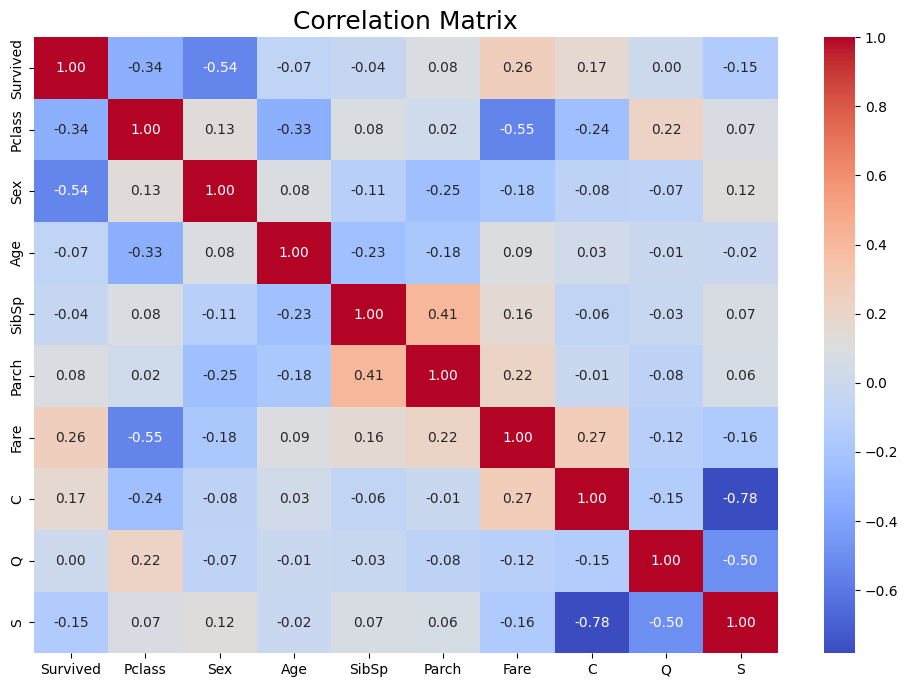

In [57]:
fig1, ax1 = plt.subplots(1, 1, figsize=(12, 8))

corr = df.corr()
ax1.set_title("Correlation Matrix", fontsize=18)
sns.heatmap(ax=ax1, data=corr, annot=True, fmt=".2f", cmap="coolwarm")
fig1;

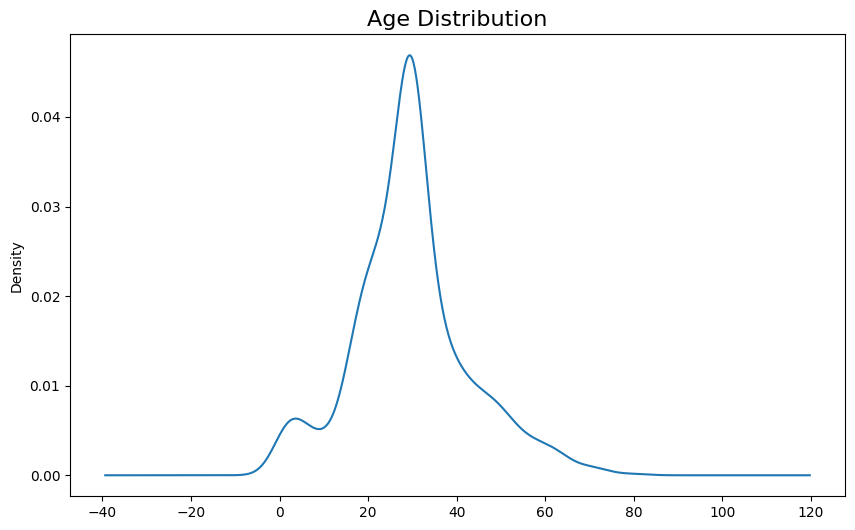

In [58]:
fig2, ax2 = plt.subplots(1, 1, figsize=(10, 6))

ax2.set_title("Age Distribution", fontsize=16)
df["Age"].plot(ax=ax2, kind="kde")
fig2;

In [59]:
counter = df["Survived"].value_counts()
len_pos = counter[1]
len_neg = counter[0]
scale = len_pos / len_neg
scale

0.6229508196721312

In [62]:
x = df.drop(columns="Survived")
y = df["Survived"]

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, shuffle=True, stratify=y, random_state=42)

print(x_train.shape, x_test.shape)

(712, 9) (179, 9)


In [85]:
def evaluate(model, x_test, y_test, model_compare=False):
    y_pred = model.predict(x_test)
    
    if not model_compare:
        print(classification_report(y_test, y_pred))

        fig, ax = plt.subplots(1, 1, figsize=(10, 10))
        cm = confusion_matrix(y_test, y_pred)
        ax.set_title(f"Confusion Matrix ({type(model).__name__})", fontsize=16)
        sns.set_theme(font_scale=1.5)
        sns.heatmap(ax=ax, data=cm, annot=True, fmt=".2f", cmap="coolwarm")
    return accuracy_score(y_test, y_pred), recall_score(y_test, y_pred), precision_score(y_test, y_pred), f1_score(y_test, y_pred)

In [94]:
def compare_models(models, x_train, y_train, x_test, y_test):
    best_accuracy, best_recall, best_precision, best_f1 = [(None, 0)] * 4
    all_results = []

    for model in models:
        model.fit(x_train, y_train)

        train_accuracy, train_recall, train_precision, train_f1 = evaluate(model, x_train, y_train, model_compare=True)
        test_accuracy, test_recall, test_precision, test_f1 = evaluate(model, x_test, y_test, model_compare=True)

        accuracy = train_accuracy * 0.8 + test_accuracy * 0.2
        recall = train_recall * 0.8 + test_recall * 0.2
        precision = train_precision * 0.8 + test_precision * 0.2
        f1 = train_f1 * 0.8 + test_f1 * 0.2

        if accuracy > best_accuracy[1]:
            best_accuracy = (model, accuracy)
        if recall > best_recall[1]:
            best_recall = (model, recall)
        if precision > best_precision[1]:
            best_precision = (model, precision)
        if f1 > best_f1[1]:
            best_f1 = (model, f1)
        
        all_results.append({
            'model': model,
            'accuracy': accuracy,
            'recall': recall,
            'precision': precision,
            'f1': f1
        })

        print(f"Model: {type(model).__name__} | Accuracy: {accuracy:.3f}, Recall: {recall:.3f}, Precision: {precision:.3f}, F1: {f1:.3f}")

    best_results = {
        "best_accuracy_model": best_accuracy,
        "best_recall_model": best_recall,
        "best_precision_model": best_precision,
        "best_f1_model": best_f1,
    }

    return all_results, best_results


In [95]:
models = [
    LogisticRegression(class_weight='balanced'),
    DecisionTreeClassifier(class_weight='balanced'),
    RandomForestClassifier(class_weight='balanced'),
    SVC(class_weight='balanced'),
    AdaBoostClassifier(),
    XGBClassifier(scale_pos_weight=scale),
    LGBMClassifier(scale_pos_weight=scale),
    CatBoostClassifier(scale_pos_weight=scale)
]

all_results, best_results = compare_models(models, x_train, y_train, x_test, y_test)

d:\Software\Anaconda\envs\tf_env_py311\Lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Model: LogisticRegression | Accuracy: 0.786, Recall: 0.760, Precision: 0.705, F1: 0.731
Model: DecisionTreeClassifier | Accuracy: 0.943, Recall: 0.925, Precision: 0.924, F1: 0.924
Model: RandomForestClassifier | Accuracy: 0.950, Recall: 0.919, Precision: 0.946, F1: 0.932
Model: SVC | Accuracy: 0.681, Recall: 0.550, Precision: 0.592, F1: 0.570
Model: AdaBoostClassifier | Accuracy: 0.819, Recall: 0.725, Precision: 0.787, F1: 0.755
Model: XGBClassifier | Accuracy: 0.928, Recall: 0.863, Precision: 0.946, F1: 0.903
[LightGBM] [Info] Number of positive: 273, number of negative: 439
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000115 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 209
[LightGBM] [Info] Number of data points in the train set: 712, number of used features: 9
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.383427 -> initscor

In [96]:
best_results

{'best_accuracy_model': (RandomForestClassifier(class_weight='balanced'),
  0.9496453455526961),
 'best_recall_model': (DecisionTreeClassifier(class_weight='balanced'),
  0.9245102723363594),
 'best_precision_model': (RandomForestClassifier(class_weight='balanced'),
  0.9461686053483631),
 'best_f1_model': (RandomForestClassifier(class_weight='balanced'),
  0.9319061434889159)}

In [97]:
best_model = RandomForestClassifier(class_weight="balanced")
best_model.fit(x_train, y_train)

RandomForestClassifier(class_weight='balanced')

              precision    recall  f1-score   support

           0       0.82      0.88      0.85       110
           1       0.78      0.68      0.73        69

    accuracy                           0.80       179
   macro avg       0.80      0.78      0.79       179
weighted avg       0.80      0.80      0.80       179



(0.8044692737430168,
 0.6811594202898551,
 0.7833333333333333,
 0.7286821705426356)

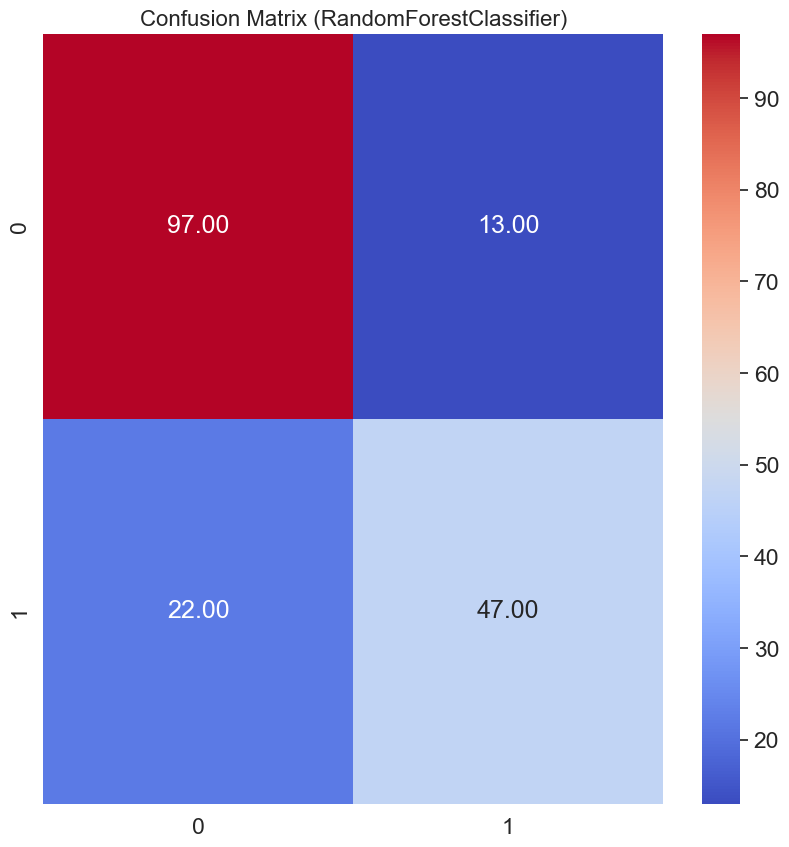

In [98]:
evaluate(best_model, x_test, y_test)

## Test Stacking!

In [104]:
learners = [
    ("xgb", XGBClassifier(scale_pos_weight=scale)),
    ("rf", RandomForestClassifier(class_weight="balanced")),
    ("svm", SVC(class_weight="balanced"))
]

base_estimator = LogisticRegression(class_weight="balanced")
stacked_model = StackingClassifier(estimators=learners, final_estimator=base_estimator)
stacked_model.fit(x_train, y_train)

StackingClassifier(estimators=[('xgb',
                                XGBClassifier(base_score=None, booster=None,
                                              callbacks=None,
                                              colsample_bylevel=None,
                                              colsample_bynode=None,
                                              colsample_bytree=None,
                                              device=None,
                                              early_stopping_rounds=None,
                                              enable_categorical=False,
                                              eval_metric=None,
                                              feature_types=None,
                                              feature_weights=None, gamma=None,
                                              grow_policy=None,
                                              importance_type=None,
                                              interaction_const...
                                              max_cat_to_onehot=None,
                                              max_delta_step=None,
                                              max_depth=None, max_leaves=None,
                                              min_child_weight=None,
                                              missing=nan,
                                              monotone_constraints=None,
                                              multi_strategy=None,
                                              n_estimators=None, n_jobs=None,
                                              num_parallel_tree=None, ...)),
                               ('rf',
                                RandomForestClassifier(class_weight='balanced')),
                               ('svm', SVC(class_weight='balanced'))],
                   final_estimator=LogisticRegression(class_weight='balanced'))

              precision    recall  f1-score   support

           0       0.84      0.85      0.85       110
           1       0.76      0.74      0.75        69

    accuracy                           0.81       179
   macro avg       0.80      0.80      0.80       179
weighted avg       0.81      0.81      0.81       179



(0.8100558659217877, 0.7391304347826086, 0.7611940298507462, 0.75)

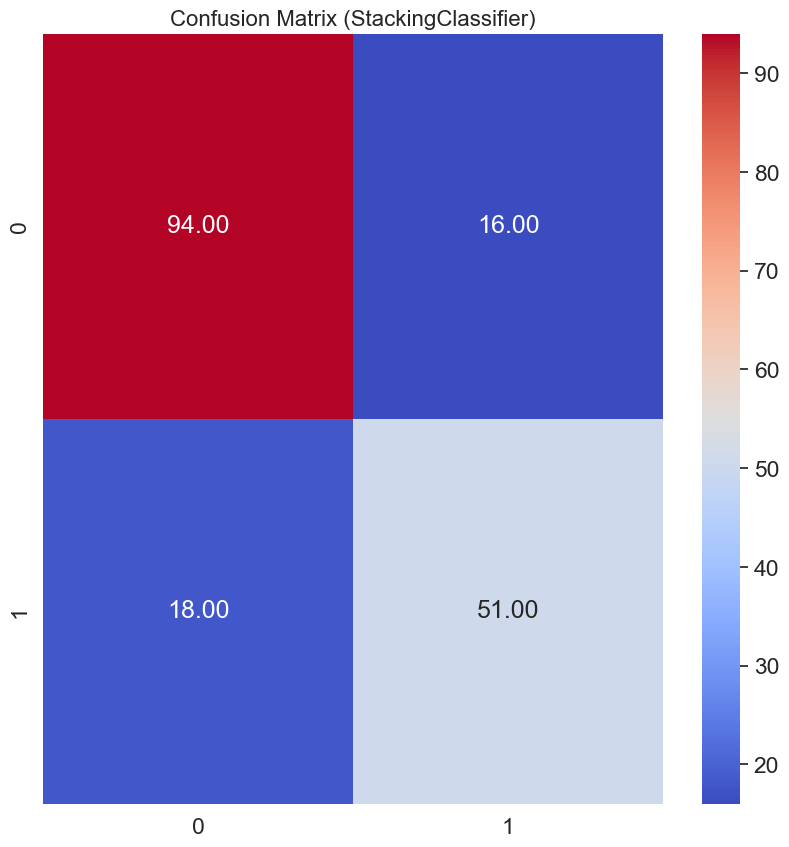

In [105]:
evaluate(stacked_model, x_test, y_test)

In [107]:
with open('models/random_forest.pkl', 'wb') as f:
    pickle.dump(best_model, f)

with open('models/stacked_model.pkl', 'wb') as f:
    pickle.dump(stacked_model, f)